# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [4]:
!pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

%pip install lightgbm

%pip install geopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

import math
import requests
from geopy.distance import geodesic
from lightgbm import LGBMRegressor
pd.set_option('display.max_columns',None)

## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [6]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/data/ephemeral/home/train.csv'
test_path  = '/data/ephemeral/home/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [7]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [8]:
pd.set_option('display.max_columns',None)

In [9]:
# TrainÍ≥º Test dataÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
display(dt.head(1))
display(dt_test.head(1))      # Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä(=Target) columnÏù¥ Ï†úÏô∏Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  202307   26  5  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN         ÏßÅÍ±∞Îûò      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0

## 3. Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [10]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [11]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

0    1118822
1       9272
Name: is_test, dtype: int64

In [12]:
concat['Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob'].unique()

array([      nan, 2.888e+03, 3.170e+02, 7.870e+02, 4.000e+00, 1.740e+02,
       2.038e+03, 1.190e+02, 6.240e+02, 2.048e+03, 1.030e+02, 1.220e+02,
       4.600e+02, 4.130e+02, 2.300e+01, 1.970e+02, 2.970e+02, 2.286e+03,
       1.269e+03, 6.400e+01, 3.010e+02, 6.200e+01, 2.196e+03, 1.215e+03,
       2.170e+02, 2.210e+02, 7.250e+02, 2.800e+02, 7.500e+01, 2.162e+03,
       7.100e+01, 2.000e+03, 1.417e+03, 2.262e+03, 1.474e+03, 8.650e+02,
       5.500e+01, 2.770e+02, 2.315e+03, 3.460e+02, 1.208e+03, 2.039e+03,
       4.910e+02, 3.080e+02, 5.000e+00, 1.496e+03, 1.790e+02, 5.310e+02,
       7.890e+02, 5.100e+01, 3.640e+02, 2.410e+02, 1.900e+01, 8.000e+00,
       1.346e+03, 1.212e+03, 9.300e+01, 2.168e+03, 1.440e+02, 7.000e+01,
       2.126e+03, 6.800e+01, 1.031e+03, 6.380e+02, 1.430e+02, 2.351e+03,
       5.260e+02, 1.040e+02, 9.000e+00, 3.750e+02, 2.190e+02, 4.500e+01,
       2.800e+01, 4.640e+02, 2.304e+03, 1.130e+02, 5.900e+01, 6.250e+02,
       6.300e+01, 7.810e+02, 4.000e+01, 3.970e+02, 

In [13]:
concat['k-ÌôàÌéòÏù¥ÏßÄ'].unique()

array([nan, 'test', 'gaepo001@naver.com', 'ÎåÄÏπòÏÇºÏÑ±.apti.co.kr',
       'ÎåÄÏπòÌòÑÎåÄ.apti.co.kr', 'www.rexleapt.com', 'ÏÑ∏Í≥°Î¶¨ÏóîÌååÌÅ¨1Îã®ÏßÄ.apti.co.kr/',
       'Í∞ïÎÇ®Ïã†ÎèôÏïÑÌååÎ∞ÄÎ¶¨Ïóê2Îã®ÏßÄ.apti.co.kr', 'https://sgprugio.aptner.com/',
       'www..openapt.seoul.go.kr', 'ÏóÜÏùå', 'ÎûòÎØ∏ÏïàÍ∞ïÎÇ®ÌûêÏ¶à.apti.co.kr',
       'scdp.co.kr', 'cdsi.apti.co.kr', 'WWW.Ï≤≠Îã¥ÏûêÏù¥.APTi.CO.KR',
       'Í∞ïÏùºÎ¶¨Î≤ÑÌååÌÅ¨2Îã®ÏßÄ.apti.co.kr/', 'intm.com/Í∞ïÏùºÎ¶¨Î≤ÑÌååÌÅ¨8Îã®ÏßÄ', 'k-apt.co.kr',
       'Í∞ïÏùºÎ¶¨Î≤ÑÌååÌÅ¨4Îã®ÏßÄ.okhomeapt.co.kr', 'Í≥†ÎçïÎ¶¨ÏóîÌååÌÅ¨2Îã®ÏßÄ', 'www.milgapt.com',
       'www.Í≥†ÎçïÎ¶¨ÏóîÌååÌÅ¨3Îã®ÏßÄ.apti.co.kr', 'gdsipark.apti.co.k',
       'www.priorpalace.net', 'home.drapt.com/choi9302',
       'cafe.daum.net/BSLP', 'cafe.daum.net/songcheoncentreville',
       'http://www.ghxi.kr/', 'wjshill.com', 'cafe.daum.net/o2vill3',
       'Î∞©Ìôî2Ï∞®Ïö∞Î¶ºÎ£®ÎØ∏ÏïÑÌä∏.apti.co.kr/', 'cafe.daum.net/banghwa12/4xuQ',
       'magokprugio.com', 'cafe.daum.net/ycth

In [14]:
concat['Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4'].unique()

array(['ÏûÑÏùò', 'ÏùòÎ¨¥', 'Í∏∞ÌÉÄ', nan, 'ÏûÑÎåÄ'], dtype=object)

In [15]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})
concat = concat.rename(columns={'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)':'Îã®ÏßÄÎ∂ÑÎ•ò'})
concat = concat.rename(columns={'k-Ï†ÑÌôîÎ≤àÌò∏':'Ï†ÑÌôîÎ≤àÌò∏'})
concat = concat.rename(columns={'k-Ìå©Ïä§Î≤àÌò∏':'Ìå©Ïä§Î≤àÌò∏'})
concat = concat.rename(columns={'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob':'Îã®ÏßÄÏÜåÍ∞úclob'})
concat = concat.rename(columns={'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)':'Î∂ÑÏñëÌòïÌÉú'})
concat = concat.rename(columns={'k-Í¥ÄÎ¶¨Î∞©Ïãù':'Í¥ÄÎ¶¨Î∞©Ïãù'})
concat = concat.rename(columns={'k-Î≥µÎèÑÏú†Ìòï':'Î≥µÎèÑÏú†Ìòï'})
concat = concat.rename(columns={'k-ÎÇúÎ∞©Î∞©Ïãù':'ÎÇúÎ∞©Î∞©Ïãù'})
concat = concat.rename(columns={'k-Ï†ÑÏ≤¥ÎèôÏàò':'Ï†ÑÏ≤¥ÎèôÏàò'})
concat = concat.rename(columns={'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò':'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'})
concat = concat.rename(columns={'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)':'Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)'})
concat = concat.rename(columns={'k-ÏãúÌñâÏÇ¨':'ÏãúÌñâÏÇ¨'})
concat = concat.rename(columns={'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº':'ÏÇ¨Ïö©ÏäπÏù∏Ïùº'})
concat = concat.rename(columns={'k-Ïó∞Î©¥Ï†Å':'Ïó∞Î©¥Ï†Å'})
concat = concat.rename(columns={'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å':'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å'})
concat = concat.rename(columns={'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å':'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å'})
concat = concat.rename(columns={'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)':'60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©'})
concat = concat.rename(columns={'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)':'60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©'})
concat = concat.rename(columns={'k-85„é°~135„é°Ïù¥Ìïò':'85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©'})
concat = concat.rename(columns={'k-135„é°Ï¥àÍ≥º':'135„é°Ï¥àÍ≥ºÏÑ∏ÎåÄÌòÑÌô©'})
concat = concat.rename(columns={'k-ÌôàÌéòÏù¥ÏßÄ':'ÌôàÌéòÏù¥ÏßÄ'})
concat = concat.rename(columns={'k-Îì±Î°ùÏùºÏûê':'Îì±Î°ùÏùºÏûê'})
concat = concat.rename(columns={'k-ÏàòÏ†ïÏùºÏûê':'ÏàòÏ†ïÏùºÏûê'})
concat = concat.rename(columns={'Ï¢åÌëúX':'X'})
concat = concat.rename(columns={'Ï¢åÌëúY':'Y'})

In [16]:
concat.head(5)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712   22  4  1987   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  54.98  201712   28  5  1987   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201801    3  4  1987   
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201801    8  2  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏       Ìå©Ïä§Î≤àÌò∏  Îã®ÏßÄÏÜåÍ∞úclob  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -  ÏïÑÌååÌä∏  025776611  025776673       NaN   
1  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -  ÏïÑÌååÌä∏  025776611  025776673       NaN   
2  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -  ÏïÑÌååÌä∏  025776611  025776673       NaN   
3  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -  ÏïÑÌååÌä∏  025776611  025776673       NaN   
4  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -  ÏïÑÌååÌä∏  025776611  025776673       NaN   

  Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨                  ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
0   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ  1987-11-21 00:00:00.0   
1   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ  1987-11-21 00:00:00.0   
2   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ  1987-11-21 00:00:00.0   
3   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ  1987-11-21 00:00:00.0   
4   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ  1987-11-21 00:00:00.0   

       Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0  22637.0  20204.0  22637.0       20.0          250.0             0.0   
1  22637.0  20204.0  22637.0       20.0          250.0             0.0   
2  22637.0  20204.0  22637.0       20.0          250.0             0.0   
3  22637.0  20204.0  22637.0       20.0          250.0             0.0   
4  22637.0  20204.0  22637.0       20.0          250.0             0.0   

   135„é°Ï¥àÍ≥ºÏÑ∏ÎåÄÌòÑÌô© ÌôàÌéòÏù¥ÏßÄ                   Îì±Î°ùÏùºÏûê                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏  \
0         NaN  NaN  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN   
1         NaN  NaN  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN   
2         NaN  NaN  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN   
3         NaN  NaN  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN   
4         NaN  NaN  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN   

  Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  \
0      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò   
1      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò   
2      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò   
3      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò   
4      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò   

                   Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú          X          Y  \
0  2022-11-17 13:00:29.0      Y       N  127.05721  37.476763   
1  2022-11-17 13:00:29.0      Y       N  127.05721  37.476763   
2  2022-11-17 13:00:29.0      Y       N  127.05721  37.476763   
3  2022-11-17 13:00:29.0      Y       N  127.05721  37.476763   
4  2022-11-17 13:00:29.0      Y       N 

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)Ïù¥ÎûÄ Îëê Ï†êÏùò Í∞íÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå **Í∑∏ ÏÇ¨Ïù¥Ïùò Í∞í**ÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÅÏÑ† Í±∞Î¶¨Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - ÏïÑÎûò ÎëêÍ∞úÏùò Î∂âÏùÄ Ï†ê ÏÇ¨Ïù¥Ïóê ($x$, $y$) Í∞íÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥, Ìï¥Îãπ Ï†êÏù¥ Îëê Î∂âÏùÄ Ï†êÏùÑ Ïù¥ÏùÄ ÏÑ†ÌòïÏ†ÅÏù∏ ÏÑ†Î∂ÑÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, Îã®Ïàú ÎπÑÎ°ÄÏãùÏúºÎ°ú ($x$, $y$)Î•º Ï∂îÏ†ïÌï¥ Î≥¥Í∞ÑÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - [Ï∞∏Í≥†ÏûêÎ£å](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


> 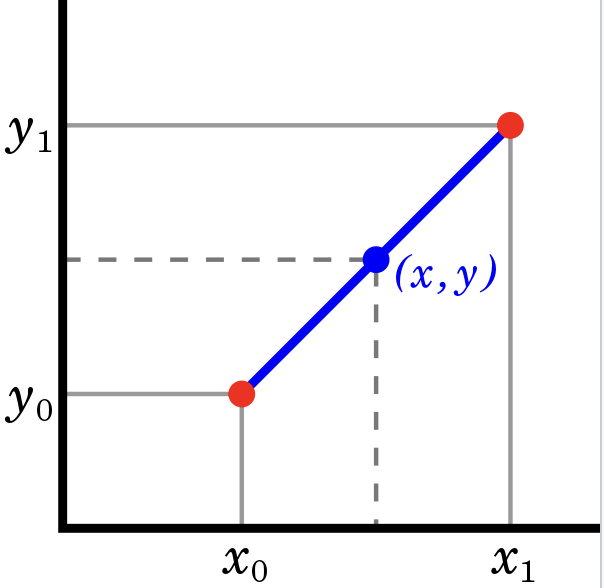

In [17]:
# Ïã§Ï†úÎ°ú Í≤∞Ï∏°ÏπòÎùºÍ≥† ÌëúÏãúÎäî ÏïàÎêòÏñ¥ÏûàÏßÄÎßå ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÎì§Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
# ÏïÑÎûò 3Í∞ÄÏßÄÏùò Í≤ΩÏö∞ Î™®Îëê ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
display(concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].value_counts())

            1111271
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê, Length: 182, dtype: int64

In [18]:
display(concat['Í±∞ÎûòÏú†Ìòï'].value_counts())

-       1086451
Ï§ëÍ∞úÍ±∞Îûò      38123
ÏßÅÍ±∞Îûò        3520
Name: Í±∞ÎûòÏú†Ìòï, dtype: int64

In [19]:
display(concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].value_counts())

-                    1090013
ÏÑúÏö∏ ÎÖ∏ÏõêÍµ¨                  2627
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨                  2540
ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨                  2508
ÏÑúÏö∏ Í∞ïÎèôÍµ¨                  2038
                      ...   
ÏÑúÏö∏ Í∞ïÎ∂ÅÍµ¨, ÏÑúÏö∏ ÏñëÏ≤úÍµ¨             1
Í≤ΩÍ∏∞ ÎÇ®ÏñëÏ£ºÏãú, Í≤ΩÍ∏∞ ÏÑ±ÎÇ®ÏàòÏ†ïÍµ¨          1
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨, Ïù∏Ï≤ú Í≥ÑÏñëÍµ¨             1
Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞, ÏÑúÏö∏ ÏÜ°ÌååÍµ¨             1
ÏÑúÏö∏ Ï§ëÎûëÍµ¨, Ïù∏Ï≤ú Î∂ÄÌèâÍµ¨             1
Name: Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ, Length: 739, dtype: int64

In [20]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

In [21]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                          0
Î≤àÏßÄ                         227
Î≥∏Î≤à                          75
Î∂ÄÎ≤à                          75
ÏïÑÌååÌä∏Î™Ö                      2136
Ï†ÑÏö©Î©¥Ï†Å                         0
Í≥ÑÏïΩÎÖÑÏõî                         0
Í≥ÑÏïΩÏùº                          0
Ï∏µ                            0
Í±¥Ï∂ïÎÖÑÎèÑ                         0
ÎèÑÎ°úÎ™Ö                          0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                 1111271
Í±∞ÎûòÏú†Ìòï                   1086451
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                 1090013
Îã®ÏßÄÎ∂ÑÎ•ò                    877273
Ï†ÑÌôîÎ≤àÌò∏                    876850
Ìå©Ïä§Î≤àÌò∏                    879348
Îã®ÏßÄÏÜåÍ∞úclob               1058958
Î∂ÑÏñëÌòïÌÉú                    876125
Í¥ÄÎ¶¨Î∞©Ïãù                    876125
Î≥µÎèÑÏú†Ìòï                    876454
ÎÇúÎ∞©Î∞©Ïãù                    876125
Ï†ÑÏ≤¥ÎèôÏàò                    877207
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   876125
Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)             

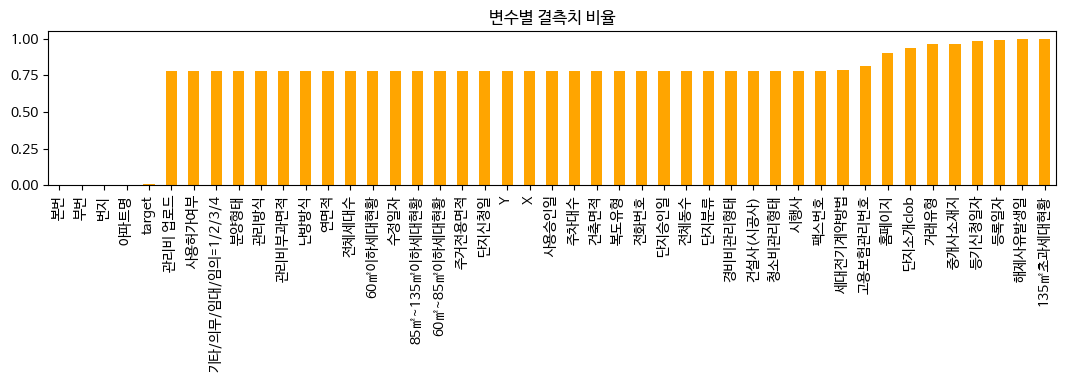

In [22]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [23]:
# NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() >= 1000000]))

* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ : ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏', 'Î∂ÑÏñëÌòïÌÉú', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'ÏãúÌñâÏÇ¨', 'ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', '60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', 'ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'X', 'Y', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test']
* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ : ['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'Îã®ÏßÄÏÜåÍ∞úcl

In [24]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [25]:
concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨                         0
Î≤àÏßÄ                        227
Î≥∏Î≤à                         75
Î∂ÄÎ≤à                         75
ÏïÑÌååÌä∏Î™Ö                     2136
Ï†ÑÏö©Î©¥Ï†Å                        0
Í≥ÑÏïΩÎÖÑÏõî                        0
Í≥ÑÏïΩÏùº                         0
Ï∏µ                           0
Í±¥Ï∂ïÎÖÑÎèÑ                        0
ÎèÑÎ°úÎ™Ö                         0
Îã®ÏßÄÎ∂ÑÎ•ò                   877273
Ï†ÑÌôîÎ≤àÌò∏                   876850
Ìå©Ïä§Î≤àÌò∏                   879348
Î∂ÑÏñëÌòïÌÉú                   876125
Í¥ÄÎ¶¨Î∞©Ïãù                   876125
Î≥µÎèÑÏú†Ìòï                   876454
ÎÇúÎ∞©Î∞©Ïãù                   876125
Ï†ÑÏ≤¥ÎèôÏàò                   877207
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                  876125
Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)               877637
ÏãúÌñâÏÇ¨                    877834
ÏÇ¨Ïö©ÏäπÏù∏Ïùº                  876259
Ïó∞Î©¥Ï†Å                    876125
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                 876170
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                876125
60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô

In [26]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 45 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ÏãúÍµ∞Íµ¨                  1128094 non-null  object 
 1   Î≤àÏßÄ                   1127867 non-null  object 
 2   Î≥∏Î≤à                   1128019 non-null  float64
 3   Î∂ÄÎ≤à                   1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                 1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                 1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                 1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                  1128094 non-null  int64  
 8   Ï∏µ                    1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                 1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                  1128094 non-null  object 
 11  Îã®ÏßÄÎ∂ÑÎ•ò                 250821 non-null   object 
 12  Ï†ÑÌôîÎ≤àÌò∏                 251244 non-null   object 
 13  Ìå©Ïä§Î≤àÌò∏             

In [27]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [28]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', '60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'X', 'Y', 'target', 'is_test']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏', 'Î∂ÑÏñëÌòïÌÉú', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'ÏãúÌñâÏÇ¨', 'ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº']


- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [29]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [30]:
concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

ÏãúÍµ∞Íµ¨                    0
Î≤àÏßÄ                     0
Î≥∏Î≤à                     0
Î∂ÄÎ≤à                     0
ÏïÑÌååÌä∏Î™Ö                   0
Ï†ÑÏö©Î©¥Ï†Å                   0
Í≥ÑÏïΩÎÖÑÏõî                   0
Í≥ÑÏïΩÏùº                    0
Ï∏µ                      0
Í±¥Ï∂ïÎÖÑÎèÑ                   0
ÎèÑÎ°úÎ™Ö                    0
Îã®ÏßÄÎ∂ÑÎ•ò                   0
Ï†ÑÌôîÎ≤àÌò∏                   0
Ìå©Ïä§Î≤àÌò∏                   0
Î∂ÑÏñëÌòïÌÉú                   0
Í¥ÄÎ¶¨Î∞©Ïãù                   0
Î≥µÎèÑÏú†Ìòï                   0
ÎÇúÎ∞©Î∞©Ïãù                   0
Ï†ÑÏ≤¥ÎèôÏàò                   0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                  0
Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)               0
ÏãúÌñâÏÇ¨                    0
ÏÇ¨Ïö©ÏäπÏù∏Ïùº                  0
Ïó∞Î©¥Ï†Å                    0
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                 0
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                0
60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©              0
60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©          0
85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©         0
ÏàòÏ†ïÏùºÏûê                   

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

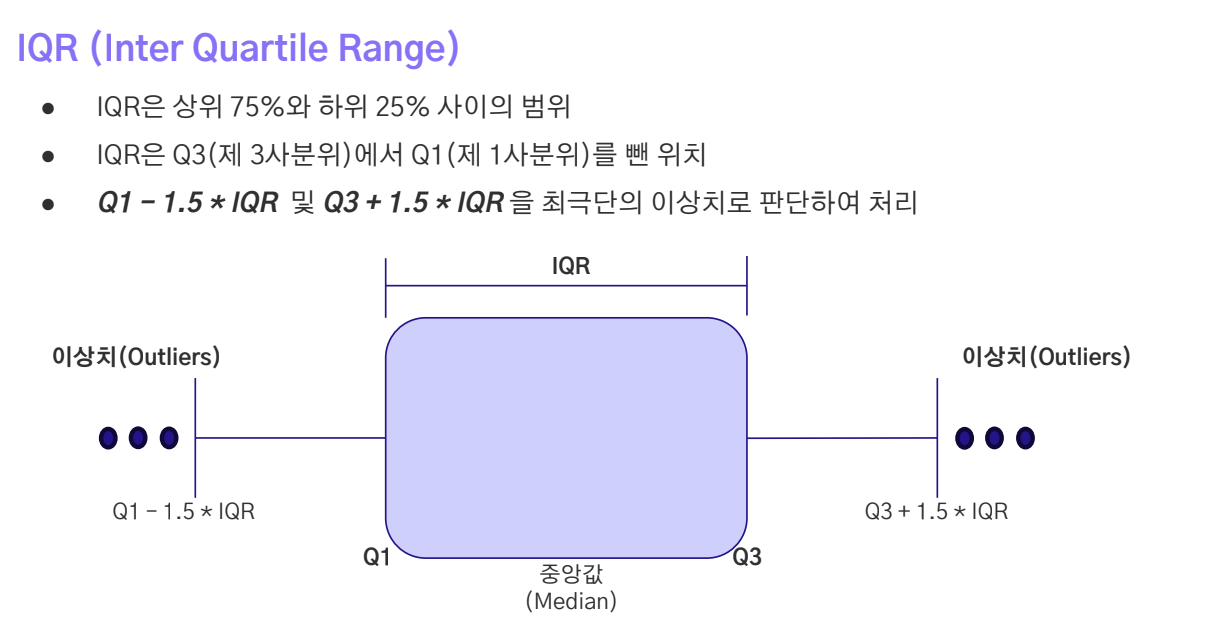

In [31]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

(1128094, 45)


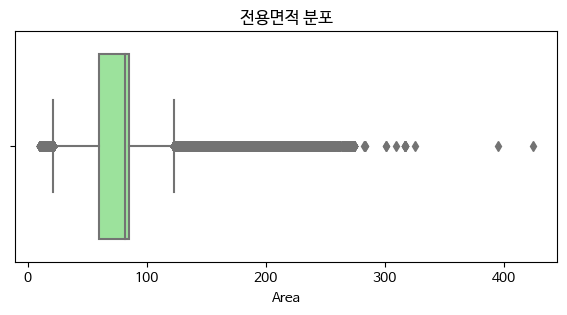

In [32]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [33]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [34]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å')

In [35]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat_select.shape)

(1038846, 45)


In [36]:
concat_select['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

0    1029574
1       9272
Name: is_test, dtype: int64

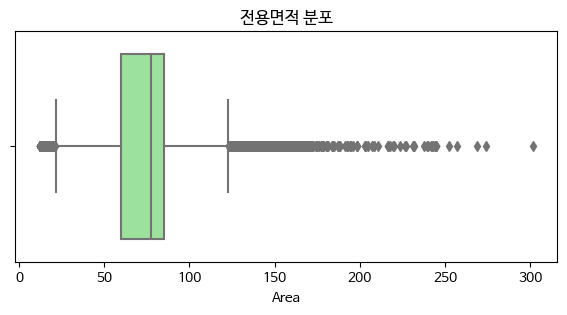

In [37]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

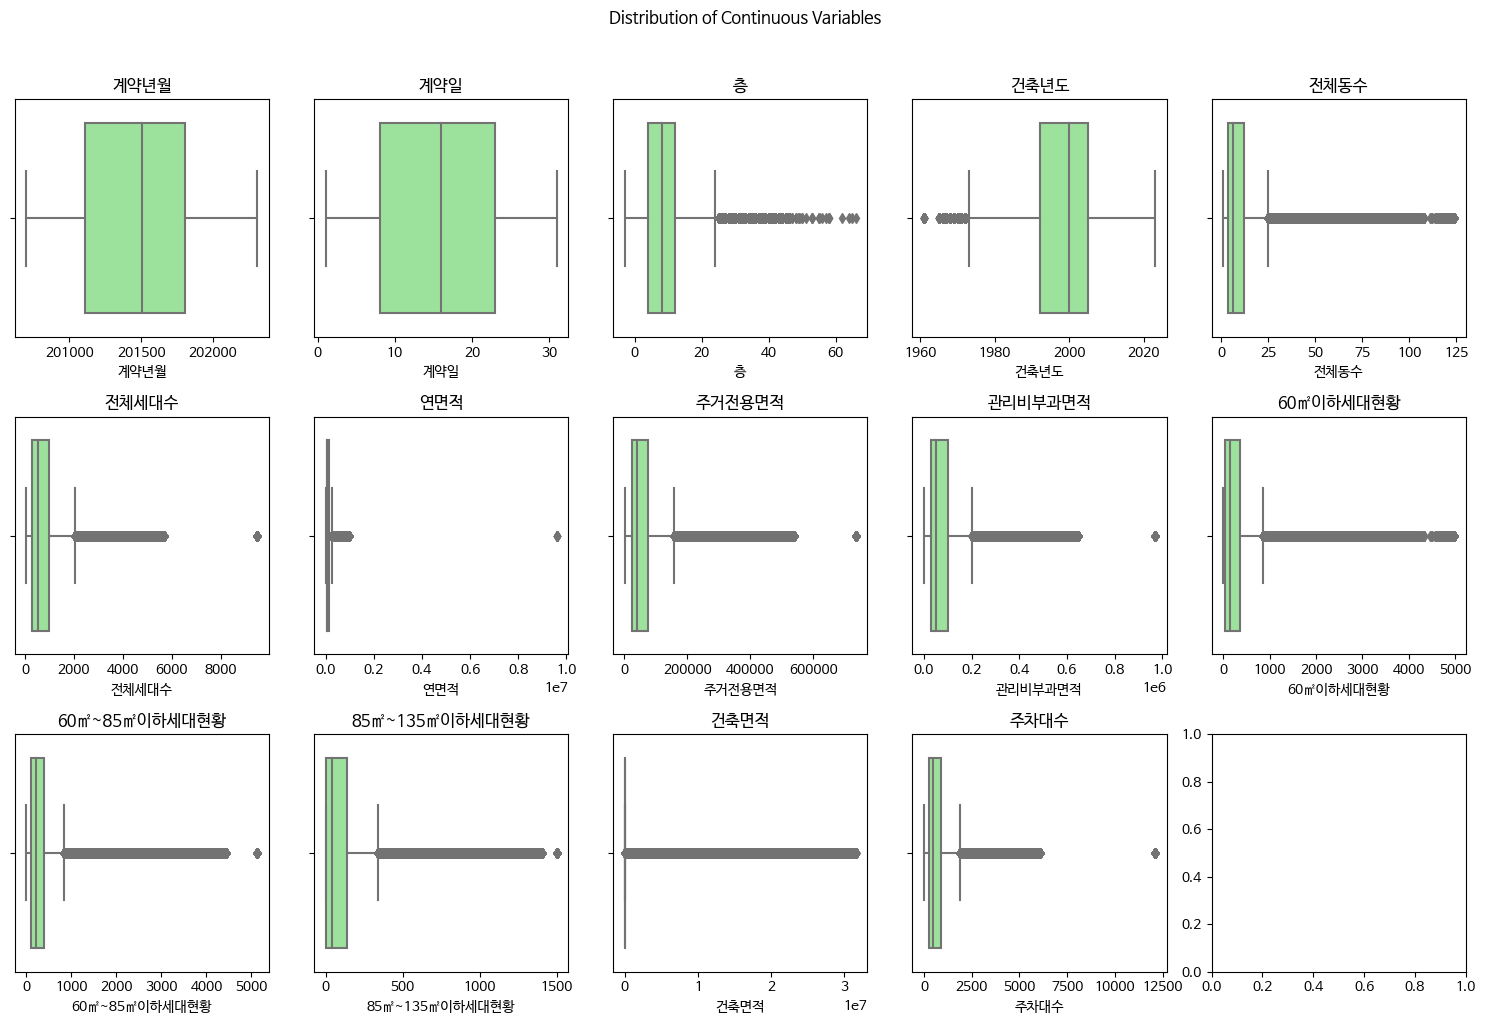

In [38]:
selected_cols = ['Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', '60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.suptitle('Distribution of Continuous Variables', y=1.02)

axes = axes.flatten()

for i, column in enumerate(selected_cols):
    sns.boxplot(data=concat_select, x=column, ax=axes[i], color='lightgreen')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [39]:
select_cols = ['Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', '60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', 'Ï£ºÏ∞®ÎåÄÏàò']
for col in select_cols:
    concat_select = remove_outliers_iqr(concat_select, col)

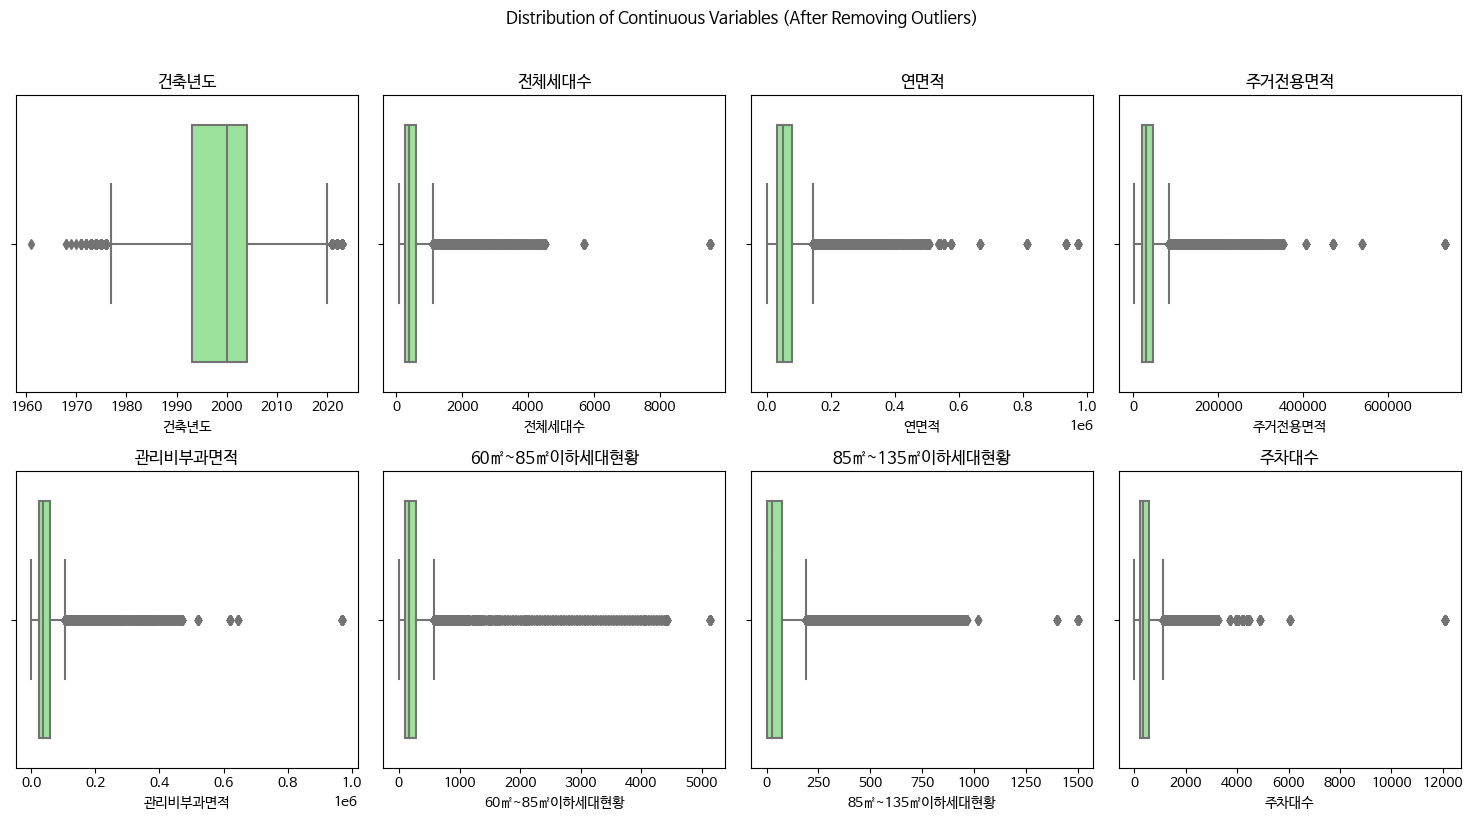

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distribution of Continuous Variables (After Removing Outliers)', y=1.02)

axes = axes.flatten()
for i, column in enumerate(select_cols):
    sns.boxplot(data=concat_select, x=column, ax=axes[i], color='lightgreen')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [41]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏       Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  \
0  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0   

  Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨                  ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0   

   60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0          250.0             0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ   

  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº  \
0     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0   

  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú          X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  \
0      Y       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0   

   is_test  
0        0

In [42]:
for col in concat_select.columns:
    missing_values = concat_select[col].isnull().sum()
    print(f"{col} Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: {missing_values}")

ÏãúÍµ∞Íµ¨ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≤àÏßÄ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥∏Î≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÄÎ≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏïÑÌååÌä∏Î™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏö©Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥ÑÏïΩÎÖÑÏõî Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥ÑÏïΩÏùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï∏µ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í±¥Ï∂ïÎÖÑÎèÑ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÎèÑÎ°úÎ™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îã®ÏßÄÎ∂ÑÎ•ò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÌôîÎ≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ìå©Ïä§Î≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÑÏñëÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥µÎèÑÏú†Ìòï Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÎÇúÎ∞©Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏ≤¥ÎèôÏàò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏãúÌñâÏÇ¨ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÇ¨Ïö©ÏäπÏù∏Ïùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ïó∞Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô© Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
60„

In [43]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/data/ephemeral/home/train.csv'
test_path  = '/data/ephemeral/home/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)
concat_select_path = '/data/ephemeral/home/code/outliers_done.csv'
#concat_select = pd.read_csv(concat_select_path)
#concat_select = concat_selects.drop('Unnamed: 0', axis=1)

In [44]:
for col in concat_select.columns:
    missing_values = concat_select[col].isnull().sum()
    print(f"{col} Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: {missing_values}")

ÏãúÍµ∞Íµ¨ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≤àÏßÄ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥∏Î≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÄÎ≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏïÑÌååÌä∏Î™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏö©Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥ÑÏïΩÎÖÑÏõî Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥ÑÏïΩÏùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï∏µ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í±¥Ï∂ïÎÖÑÎèÑ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÎèÑÎ°úÎ™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îã®ÏßÄÎ∂ÑÎ•ò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÌôîÎ≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ìå©Ïä§Î≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÑÏñëÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥µÎèÑÏú†Ìòï Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0


ÎÇúÎ∞©Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏ≤¥ÎèôÏàò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏãúÌñâÏÇ¨ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÇ¨Ïö©ÏäπÏù∏Ïùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ïó∞Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô© Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô© Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô© Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏàòÏ†ïÏùºÏûê Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í±¥Ï∂ïÎ©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï£ºÏ∞®ÎåÄÏàò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îã®ÏßÄÏäπÏù∏Ïùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0

In [45]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏       Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  \
0  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0   

  Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨                  ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0   

   60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0          250.0             0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ   

  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº  \
0     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0   

  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú          X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  \
0      Y       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0   

   is_test  
0        0

## 4. Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [46]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [47]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò',
       'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏', 'Î∂ÑÏñëÌòïÌÉú', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
       'Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'ÏãúÌñâÏÇ¨', 'ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', '60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©',
       '60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', 'ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº',
       'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'X', 'Y', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'Íµ¨', 'Îèô',
       'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî'],
      dtype='object')

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [48]:
all = list(concat_select['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [49]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat_select['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat_select['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [50]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò',
       'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏', 'Î∂ÑÏñëÌòïÌÉú', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
       'Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'ÏãúÌñâÏÇ¨', 'ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', '60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©',
       '60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', 'ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº',
       'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'X', 'Y', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test', 'Íµ¨', 'Îèô',
       'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä'],
      dtype='object')

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [51]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    730155.000000
mean       1998.836670
std           8.685417
min        1961.000000
10%        1987.000000
25%        1993.000000
50%        2000.000000
75%        2004.000000
80%        2006.000000
90%        2009.000000
max        2023.000000
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [52]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [53]:
concat_select.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   

        Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨  \
0  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   

                   ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   

   85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0             0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

           X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  is_test    Íµ¨    Îèô  \
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   

    Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  
0  2017  12     1     0

In [54]:
concat_select.shape

(730155, 49)

ÏïÑÌååÌä∏ ÎÖ∏ÌõÑÎèÑ

In [55]:
concat_select['ÎÖ∏ÌõÑÎèÑ'] = 2025-concat_select['Í±¥Ï∂ïÎÖÑÎèÑ']

x,y,z

In [56]:
coslat = concat_select['X'].apply(lambda x : math.cos(x))
coslong  = concat_select['Y'].apply(lambda x : math.cos(x))
sinlat = concat_select['X'].apply(lambda x : math.sin(x))
sinlong = concat_select['Y'].apply(lambda x : math.sin(x))

concat_select['x3'] = coslat*coslong
concat_select['y3'] = coslat*sinlong
concat_select['z3'] = sinlat

ÎèÑÎ°úÎ™Ö Ï£ºÏÜåÎ°ú Ï¢åÌëú ÏñªÍ∏∞ https://business.juso.go.kr/addrlink/openApi/popupApi.do
<p>Ï¥àÎì±ÌïôÍµê/Ï§ëÌïôÍµê/Í≥†Îì±ÌïôÍµê(Í∞ÄÏû• Í∞ÄÍπåÏö¥) + Í±∞Î¶¨ https://developers.kakao.com/docs/latest/ko/local/dev-guide </p>
<p>ÏÇ¨ÏÑ§ÌïôÏõê(2kmÏù¥ÎÇ¥ ÌïôÏõêÏàò)(https://developers.kakao.com/docs/latest/ko/local/dev-guide)</p>
<p>Í≥†ÍµêÎ≥Ñ ÏàòÎä• Íµ≠Ïàò ÌèâÍ∑† Î∞±Î∂ÑÏúÑ(https://cafe.naver.com/we2you/6167)</p>

Í≥†Îì±ÌïôÍµê

In [52]:
def get_nearest_highschool(api_key, x, y, n):
    # Kakao Maps API Ìò∏Ï∂úÏùÑ ÏúÑÌïú Í∏∞Î≥∏ ÏÑ§Ï†ï
    base_url = "https://dapi.kakao.com/v2/local/search/keyword.json"
    headers = {"Authorization": f"KakaoAK {api_key}"}

    # Kakao Maps APIÏóê ÏöîÏ≤≠
    query = "Í≥†Îì±ÌïôÍµê"  # Ï∂îÍ∞Ä: "Í≥†Îì±ÌïôÍµê" ÌÇ§ÏõåÎìúÎ•º Í≤ÄÏÉâÏñ¥Ïóê Ï∂îÍ∞Ä
    response = requests.get(base_url, headers=headers, params={"query": query, "x": x, "y": y, "sort": "distance"})
    data = response.json()

    # ÏùëÎãµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê Ï†ïÎ≥¥ Ï∂îÏ∂ú
    highschool_info = data.get("documents", [])

    # SC4 Ïπ¥ÌÖåÍ≥†Î¶¨Ïù∏ Í≤ΩÏö∞ place_nameÍ≥º distanceÎ•º Î∞òÌôò, ÏïÑÎãå Í≤ΩÏö∞ Ìå®Ïä§
    sc4_highschool_data = [(school['place_name'], school.get('distance', '')) for school in highschool_info if 'SC4' in school.get('category_group_code', '')][:n]

    return sc4_highschool_data

# Kakao Maps API ÌÇ§ ÏÑ§Ï†ï
api_key = ""

# ÎèÑÎ°úÎ™Ö Ï£ºÏÜåÏóêÏÑú Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê Í≤ÄÏÉâ Î∞è Í≤∞Í≥º Ï∂îÍ∞Ä
concat_select['Í≥†Îì±ÌïôÍµê'] = concat_select.apply(lambda row: get_nearest_highschool(api_key, row['X'], row['Y'], 3), axis=1)

# Extract distance for the first school and create a new column
concat_select['Í≥†Îì±ÌïôÍµê Í±∞Î¶¨'] = concat_select['Í≥†Îì±ÌïôÍµê'].apply(lambda x: x[0][1] if x else '')
concat_select['Í≥†Îì±ÌïôÍµê'] = concat_select['Í≥†Îì±ÌïôÍµê'].apply(lambda schools: [school[0] for school in schools])

concat_select.head()

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   
1  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97   22  4  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   
2  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  54.98   28  5  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   
3  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    3  4  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   
4  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  2  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   

        Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨  \
0  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   
1  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   
2  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   
3  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   
4  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   

                   ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   
1  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   
2  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   
3  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   
4  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   

   85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0             0.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   
1             0.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   
2             0.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   
3             0.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   
4             0.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   
1  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   
2  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   
3  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   
4  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

           X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  is_test    Íµ¨    Îèô  \
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   
1  127.05721  37.476763  2022-11-17 10:19:06.0  123500.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   
2  127.05721  37.476763  2022-11-17 10:19:06.0   91500.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   
3  127.05721  37.476763  2022-11-17 10:19:06.0  130000.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   
4  127.05721  37.476763  2022-11-17 10:19:06.0  117000.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   

    Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  \
0  2017  12     1     0   38  0.172023 -0.038892  0.984325   
1  2017  12     1     0   38  0.172023 -0.038892  0.984325   
2  2017  12     1     0   38  0.172023 -0.038892  0.984325   
3  2018  01     1     0   38  0.172023 -0.038892  0.984325   
4  2018  01     1     0   38  0.172023 -0.038892  0.984325   

                   

In [ ]:
concat_select

In [31]:
schools = [
    "ÏÑúÏö∏11407 ÌïòÎÇòÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11184 ÏÑ∏ÌôîÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11218 ÌúòÎ¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11267 ÏÑ∏ÌôîÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11335 Î≥¥Ïù∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11180 ÏÑ†ÎçïÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11503 ÎåÄÏõêÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11269 ÏàôÎ™ÖÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11147 Í∞ïÏÑúÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11205 Ï§ëÎèôÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11219 Ï§ëÏÇ∞Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11504 ÎåÄÏùºÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11159 Îã®Íµ≠ÏÇ¨ÎåÄÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11272 Î™©ÎèôÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11505 Î™ÖÎçïÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11582 ÏÑúÏö∏Íµ≠Ï†úÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11507 ÌïúÏòÅÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11189 ÏñëÏ†ïÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11221 ÌïúÍ∞ÄÎûåÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11287 ÏßÑÏÑ†Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11175 Î∞∞Ïû¨Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11202 Ïû•ÌõàÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11506 Ïù¥ÌôîÏó¨ÏûêÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11103 Í≤ΩÍ∏∞Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11139 Ïû†Ïã†Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11231 Í≤ΩÍ∏∞Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11280 Ïù¥ÌôîÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11206 Ï§ëÏïôÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11191 ÏòÅÎèôÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11160 ÎåÄÍ¥ëÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11291 ÌïúÏñëÏÇ¨ÎåÄÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11263 ÏÑúÎ¨∏Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11247 ÎåÄÏßÑÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11214 ÌòÑÎåÄÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11286 ÏßÑÎ™ÖÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11165 ÎåÄÏßÑÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11118 Î∞òÌè¨Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11199 Ïù¥ÌôîÏó¨ÎåÄÎ∂ÄÏÜçÏù¥Ìôî:Í∏àÎûÄÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11282 Ï†ïÏã†Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11281 Ïû†Ïã§Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11177 ÏÉÅÎ¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11279 ÏùÄÍ¥ëÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11274 ÏòÅÎèôÏùºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11270 Ïà≠ÏùòÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11203 Ïû¨ÌòÑÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11109 Í¥ëÎÇ®Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11188 Ïã†ÏùºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11204 Ï§ëÏïôÏÇ¨ÎåÄÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11164 ÎåÄÏùºÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11502 ÌïúÏÑ±Í≥ºÌïôÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11186 Ïà≠Î¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11170 Î™ÖÎçïÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11169 ÎßàÌè¨Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11121 ÏÑúÏö∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11190 ÏñëÏ≤úÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11213 ÌïúÏòÅÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11253 Î™ÖÎçïÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11176 Î≥¥ÏÑ±Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11278 Ïö©ÌôîÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11102 Í∞úÌè¨Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11136 Ïö©ÏÇ∞Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11295 ÌúòÍ≤ΩÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11262 ÏÉÅÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11584 Íµ¨ÌòÑÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11508 ÏÑúÏö∏Ïô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11128 Ïã†Î™©Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11152 Í≤ΩÌù¨Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11161 ÎåÄÏÑ±Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11237 Ïó¨ÏùòÎèÑÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11275 ÏòÅÏã†Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11262 ÏÉÅÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11277 ÏòàÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11580 ÏõêÎ¨µÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11250 ÎèôÎçïÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11178 ÏÑúÎùºÎ≤åÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11243 Í≥ÑÏÑ±Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11239 Ï∞ΩÎçïÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11131 Ïó¨ÏùòÎèÑÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11265 ÏÑ±Ïã†Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11256 ÏÑúÏö∏Î¨∏ÏòÅÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11129 ÏñëÏû¨Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11182 ÏÑ±ÎÇ®Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11249 ÎçïÏõêÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11252 ÎèôÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11140 Ïû†Ïã§Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11296 Í≤ΩÎ≥µÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11591 Ïã†ÎèÑÎ¶ºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11198 Î∞±ÏïîÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11266 ÏÑ±Ïã¨Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11420 Ïû†ÏùºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11316 ÎèôÏñëÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11130 Ïñ∏ÎÇ®Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11123 ÏÑúÏ¥àÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11257 ÎØ∏Î¶ºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11149 Í≤ΩÎ¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11289 ÌíçÎ¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11217 ÌôòÏùºÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11293 ÌòúÏõêÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11143 Ï≤≠Îã¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11234 Î¨¥ÌïôÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11200 Ïù∏Ï∞ΩÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11179 ÏÑúÏö∏ÏÑ∏Ï¢ÖÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11261 ÏÉÅÎ™ÖÏÇ¨ÎåÄÎ∂ÄÏÜçÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11113 ÏïïÍµ¨Ï†ïÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11258 Î∞∞ÌôîÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11285 Ï§ëÏïôÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11254 ÎèôÍµ≠ÏÇ¨ÎåÄÎ∂ÄÏÜçÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11236 ÏàòÎèÑÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11235 ÏÑúÏö∏Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11292 ÌòúÏÑ±Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11288 Ï∞ΩÎ¨∏Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11404 ÏÑúÏö∏ÏòàÏà†Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11294 ÌôçÏùµÏÇ¨ÎåÄÎ∂ÄÏÜçÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11154 Í¥ëÎ¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11276 ÏòÅÌååÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11173 Î∞∞Î™ÖÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11232 Í∏àÏò•Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11195 Ïò§ÏÇ∞Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11586 Ìï¥ÏÑ±Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11264 ÏÑ†ÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11172 Î¨∏ÏùºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11383 Ï≤≠ÏõêÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11193 ÏòÅÏùºÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11211 ÌïúÏÑúÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11196 Ïö©Î¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11389 Î∞©ÏÇ∞Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11283 Ï†ïÏùòÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11395 ÏÑ†Ïú†Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11158 ÎÇ®Í∞ïÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11183 ÏÑ±Î≥¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11101 Í∞ÄÎùΩÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11148 Í±¥Íµ≠ÏÇ¨ÎåÄÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11155 Í¥ëÏÑ±Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11233 Î™ÖÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11248 ÎçïÏÑ±Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11216 ÌôîÍ≥°Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11251 ÎèôÎ™ÖÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11181 ÏÑ†Ï†ïÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11168 ÎèôÏÑ±Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11397 Î∂àÏïîÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11167 ÎèôÎ∂ÅÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11108 Í¥ÄÏïÖÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11394 Í≤ΩÏùºÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11399 Í∞ïÏùºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11151 Í≤ΩÏã†Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11242 Í≤ΩÌù¨Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11421 Íµ¨ÏïîÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11238 ÏòÅÎì±Ìè¨Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11207 Ï≤≠ÏõêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11220 ÎëîÏ¥åÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11162 ÎåÄÏã†Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11210 ÌïúÍµ≠ÏÇºÏú°Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11246 ÎåÄÏõêÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11331 ÎåÄÎèôÏÑ∏Î¨¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11138 ÏûêÏñëÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11290 ÌïúÏÑ±Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11116 ÎèôÏûëÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11197 Ïö∞Ïã†Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11382 Ïò§Î•òÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11393 Îì±Ï¥åÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11174 Î∞∞Î¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11240 ÌòúÌôîÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11156 Í¥ëÏã†Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11141 Ï§ëÍ≤ΩÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11171 Î™ÖÏßÄÍ≥†Îì±ÌïôÍµê",   "ÏÑúÏö∏11125 ÏÑ±ÎèôÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11405 ÏÑ†ÌôîÏòàÏà†Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11187 Ïà≠Ïã§Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11117 Î©¥Î™©Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11120 ÏÉÅÍ≥ÑÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11244 Í¥ëÏòÅÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11589 ÏÑ±ÏàòÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11112 Íµ¨ÏùºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11212 ÌïúÏÑ±Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11400 Î¨∏ÌòÑÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11132 ÏòÅÎì±Ìè¨Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11146 Í∞ïÎèôÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11593 ÏßÑÍ¥ÄÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11201 Ïû•Ï∂©Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11110 Í¥ëÏñëÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11215 ÌôçÏùµÏÇ¨ÎåÄÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11114 ÎãπÍ≥°Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11135 ÎÖ∏ÏõêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11105 Í≤ΩÎ≥µÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11387 Ï∞ΩÎèôÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11166 ÎèôÍµ≠ÎåÄÏÇ¨ÎåÄÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11384 Í≤ΩÏù∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11352 ÏÑ±ÎçïÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11585 Î¨∏Ï†ïÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11388 ÎàÑÏõêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11259 Î≥¥ÏÑ±Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11194 ÏòÅÌõàÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11392 ÎèÑÎ¥âÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11576 ÏÑ∏ÌòÑÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11312 ÏÑ†Î¶∞Ïù∏ÌÑ∞ÎÑ∑Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11581 ÏÉÅÏïîÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11134 Ïò§Í∏àÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11137 Ïù∏ÌóåÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11145 ÌÉúÎ¶âÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11314 Îã®Íµ≠ÎåÄÌïôÍµêÎ∂ÄÏÜçÏÜåÌîÑÌä∏Ïõ®Ïñ¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11271 Ïã†Í¥ëÏó¨ÏûêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11577 Ïã†ÏÑúÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11208 Ï∂©ÏïîÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11260 ÏÉÅÎ™ÖÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11122 ÏÑúÏö∏ÏÇ¨ÎåÄÎ∂ÄÏÑ§Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11390 Ïã†ÌòÑÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11107 Í≥µÌï≠Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11153 Í≥†Î†§ÏÇ¨ÎåÄÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11396 ÏõîÍ≥ÑÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11115 ÎåÄÏòÅÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11150 Í≤ΩÏÑ±Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11595 Í∞ÄÏû¨Ïö∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11597 Í∏àÌò∏Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11111 Íµ¨Î°úÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11192 ÏòÅÎùΩÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11127 Ïã†Î¶ºÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11163 ÎåÄÏõêÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11412 ÏÑ†ÏÇ¨Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11106 Í≥†Ï≤ôÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11119 ÏÇºÏÑ±Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11124 ÏÑùÍ¥ÄÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11273 ÏóºÍ¥ëÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11596 ÎèÑÏÑ†Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11144 Ï≤≠ÎüâÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11411 Ïã†ÎèÑÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11391 ÏûêÏö¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11419 ÌúòÎ¥âÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11386 ÏàòÎùΩÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11133 ÏòÅÏã†Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11578 Ìö®Î¨∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11340 ÎØ∏ÎûòÏÇ∞ÏóÖÍ≥ºÌïôÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11592 ÏùÄÌèâÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11402 ÎçïÏõêÏòàÏà†Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11588 ÎØ∏ÏñëÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11185 ÏÜ°Í≥°Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11126 Í∏àÏ≤úÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11376 ÏÑúÏö∏ÎØ∏Ïà†Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11157 Í¥ëÏòÅÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11590 ÏàòÎ™ÖÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11268 ÏÜ°Í≥°Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11142 Ï§ëÌôîÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11413 ÏÇºÍ∞ÅÏÇ∞Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11104 Í≤ΩÎèôÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11361 Ìï¥ÏÑ±Íµ≠Ï†úÏª®Î≤§ÏÖòÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11385 ÎèÖÏÇ∞Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11355 ÏÑúÏö∏ÏòÅÏÉÅÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11369 ÏòàÏùºÎîîÏûêÏù∏Í≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11356 Ïù¥ÌôîÏó¨ÎåÄÎ≥ëÏÑ§ÎØ∏ÎîîÏñ¥Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11344 Í≤ΩÎ≥µÎπÑÏ¶àÎãàÏä§Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11371 ÎåÄÏßÑÎîîÏûêÏù∏Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11308 Í≤ΩÍ∏∞ÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11353 ÏÑ±ÏïîÍµ≠Ï†úÎ¨¥Ïó≠Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11350 ÏÑúÏö∏Ïó¨ÏûêÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11342 ÏóºÍ¥ëÏó¨ÏûêÎ©îÎîîÌÖçÍ≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11209 ÌïúÍ¥ëÍ≥†Îì±ÌïôÍµê",
    "ÏÑúÏö∏11360 ÏÑúÏö∏Í≥µÏó∞ÏòàÏà†Í≥†Îì±ÌïôÍµê",    "ÏÑúÏö∏11310 ÎçïÏàòÍ≥†Îì±ÌïôÍµê"

]

scores = [
    88.71, 84.64, 84.12, 84.06, 83.83, 83.2, 82.7, 82.67, 82.58, 81.65,
    81.15, 80.8, 80.52, 80.43, 79.62, 79.59, 79.42, 78.25, 78.11, 77.56,
    76.86, 76.83, 76.06, 75.58, 75.57, 75.52, 75.46, 75.13, 75.03, 74.79,
    74.69, 73.79, 73.7, 73.4, 73.18, 73.06, 72.72, 72.71, 72.43, 72.38,
    72.28, 71.45, 70.6, 70.55, 70.06,
    69.98, 69.63, 68.92, 68.73, 68.73, 68.71, 68.64, 68.54, 68.31,
    68.19, 67.95, 67.93, 67.91, 67.82, 67.66, 67.66, 67.27, 67.14,
    66.97, 66.76, 66.18, 66.12, 66.11, 65.6, 65.59, 65.51, 65.51,
    65.48, 65.35, 65.34, 65.03, 64.78, 64.77, 64.72, 64.26, 64.23,
    64.09, 64, 63.95, 63.85, 63.75, 63.27, 63.19, 62.82, 62.62, 62.21,
    62.1, 61.95, 61.73, 61.45, 61.43, 61.39, 61.21, 61.17, 61.05, 60.81,
    60.68, 60.43, 60.12, 60.1, 60.04, 60, 59.85, 59.72, 59.62, 59.6,
    59.44, 59.4, 59.25, 59.23, 59.16, 58.95, 58.91, 58.9, 58.89, 58.63,
    58.62, 58.5, 58.46, 58.34, 58.22, 58.09, 58.0, 57.97, 57.82, 57.75,
    57.63, 57.51, 57.41, 57.35, 57.12, 57.07, 56.84, 56.83, 56.7, 56.69,
    56.64, 56.56, 56.23, 56.12, 56.03, 55.96, 55.78, 55.77, 55.4, 55.23,
    54.9, 54.9, 54.86, 54.79, 54.77, 54.45, 54.14, 54.05, 54.03, 53.68,
    53.67, 53.66, 53.45, 53.39, 53.3, 53.16, 53.09, 53.08, 52.95, 52.75,
    52.71, 52.59, 52.12, 52.06, 51.98, 51.92,
    51.74, 51.66, 51.61, 51.61, 51.58, 51.47, 51.37, 51.32, 51.24, 50.9,
    50.62, 50.58, 50.54, 50.53, 50.47, 50.41, 50.12, 50.1, 50.1, 50.03,
    49.99, 49.91, 49.77, 49.65, 49.5, 49.48, 49.37, 49.34, 49.01, 48.92,
    48.9, 48.85, 48.73, 48.52, 48.42, 48.24, 47.98, 47.92, 47.85, 47.83,
    47.5, 47.4, 47.37, 46.98, 46.93, 46.81, 46.71, 46.19, 46.13, 45.92,
    45.87, 45.71, 45.44, 44.85, 44.81, 44.74, 44.68, 43.92, 43.46, 43.4,
    43.31, 43.22, 43.1, 42.54, 40.76, 40.54, 40.02, 39.96, 37.22, 35.41,
    35.38, 35.19, 32.7, 31.75, 30.67, 30.58, 23.54, 21.52, 20.59, 19.78
]

score_df = pd.DataFrame({'ÌïôÍµê': schools, 'Ï†êÏàò': scores})

score_df['ÌïôÍµê'] = score_df['ÌïôÍµê'].apply(lambda x: x.split()[-1])
score_df.head()

ÌïôÍµê     Ï†êÏàò
0    ÌïòÎÇòÍ≥†Îì±ÌïôÍµê  88.71
1    ÏÑ∏ÌôîÍ≥†Îì±ÌïôÍµê  84.64
2    ÌúòÎ¨∏Í≥†Îì±ÌïôÍµê  84.12
3  ÏÑ∏ÌôîÏó¨ÏûêÍ≥†Îì±ÌïôÍµê  84.06
4    Î≥¥Ïù∏Í≥†Îì±ÌïôÍµê  83.83

In [53]:
concat_select['ÌïôÍµ∞Ï†êÏàò'] = concat_select['Í≥†Îì±ÌïôÍµê'].apply(lambda schools: sum(score_df[score_df['ÌïôÍµê'].isin(schools)]['Ï†êÏàò']) / len(schools) if schools else None)

In [54]:
concat_select.to_csv('highschoolscore_done.csv')

In [57]:
concat_select_path = '/data/ephemeral/home/code/highschoolscore_done.csv'
score = pd.read_csv(concat_select_path)
score = score[['Í≥†Îì±ÌïôÍµê Í±∞Î¶¨','ÌïôÍµ∞Ï†êÏàò']]

In [149]:
concat_select.shape

(730155, 53)

In [58]:
concat_select.head(1)

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   

        Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨  \
0  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   

                   ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   

   85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0             0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

           X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  is_test    Íµ¨    Îèô  \
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   

    Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  
0  2017  12     1     0   38  0.172023 -0.038892  0.984325

In [151]:
score.head(1)

Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò
0    521.0  22.553333

In [152]:
score.shape

(730155, 2)

In [59]:
concat_select['Í≥†Îì±ÌïôÍµê Í±∞Î¶¨'] = score['Í≥†Îì±ÌïôÍµê Í±∞Î¶¨']

In [60]:
concat_select['ÌïôÍµ∞Ï†êÏàò'] = score['ÌïôÍµ∞Ï†êÏàò']

In [61]:
for col in concat_select.columns:
    missing_values = concat_select[col].isnull().sum()
    print(f"{col} Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: {missing_values}")

Î≤àÏßÄ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥∏Î≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÄÎ≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏïÑÌååÌä∏Î™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏö©Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥ÑÏïΩÏùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï∏µ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í±¥Ï∂ïÎÖÑÎèÑ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÎèÑÎ°úÎ™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îã®ÏßÄÎ∂ÑÎ•ò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÌôîÎ≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ìå©Ïä§Î≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÑÏñëÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥µÎèÑÏú†Ìòï Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÎÇúÎ∞©Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏ≤¥ÎèôÏàò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏãúÌñâÏÇ¨ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÇ¨Ïö©ÏäπÏù∏Ïùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ïó∞Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô© Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô© Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
85„é°~135„é°Ïù¥ÌïòÏÑ

In [62]:
concat_select = concat_select.groupby('Íµ¨').apply(lambda group: group.fillna(group.mean())).reset_index(drop=True)

In [63]:
concat_select.tail(1)

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ        ÎèÑÎ°úÎ™Ö  Îã®ÏßÄÎ∂ÑÎ•ò  Ï†ÑÌôîÎ≤àÌò∏  \
730154  538  538.0  0.0   Ïã†ÏòÅ  16.93   18  4  2013  Î©¥Î™©Î°ú69Í∏∏ 16  NULL  NULL   

        Ìå©Ïä§Î≤àÌò∏  Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù  Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù      Ï†ÑÏ≤¥ÎèôÏàò       Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)   ÏãúÌñâÏÇ¨  \
730154  NULL  NULL  NULL  NULL  NULL  4.901163  524.912791     NULL  NULL   

       ÏÇ¨Ïö©ÏäπÏù∏Ïùº           Ïó∞Î©¥Ï†Å        Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å   60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
730154  NULL  76069.063953  38075.494186  37758.0  190.116279     316.482558   

        85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú        Í±¥Ï∂ïÎ©¥Ï†Å  \
730154       18.313953  NULL     NULL    NULL     NULL    NULL  1263.33314   

              Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú           X  \
730154  598.709302                NULL  NULL   NULL    NULL  127.116324   

                Y Îã®ÏßÄÏã†Ï≤≠Ïùº   target  is_test    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  \
730154  37.522414  NULL  13250.0        1  Ï§ëÎûëÍµ¨  Î©¥Î™©Îèô  2023  07     0     1   

        ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò  
730154   12  0.116067 -0.020725  0.993025    301.0  55.826667

Ïö©Ï†ÅÎ•†

Í≤ΩÏÇ¨ÎèÑ(ÏïÑÌååÌä∏ Îã®ÏßÄÎ°úÎ∂ÄÌÑ∞ 400mÎÇ¥ ÌèâÍ∑† Í≤ΩÏÇ¨ÎèÑ) Íµ≠Í∞ÄÍ≥µÍ∞ÑÏ†ïÎ≥¥Ìè¨ÌÑ∏(ÌïúÍµ≠Íµ≠ÌÜ†Ï†ïÎ≥¥Í≥µÏÇ¨, n.d.)

NDVI(Ï†ïÍ∑úÏãùÏÉùÏßÄÏàò) ÏïÑÌååÌä∏ Îã®ÏßÄÎ°úÎ∂ÄÌÑ∞ 400m ÎÇ¥ ÌèâÍ∑† ndvi(ÎØ∏Íµ≠ ÏßÄÏßàÏ°∞ÏÇ¨Ïõê)

Í≥µÏõê(Í∞ÄÏû• Í∞ÄÍπåÏö¥)
ÌïòÏ≤ú(Í∞ÄÏû• Í∞ÄÍπåÏö¥)
ÌïúÍ∞ï

ÏÉÅÍ∞Ä ÍπåÏßÄÏùò Í±∞Î¶¨

ÏßÄÌïòÏ≤†Ïó≠ÍπåÏßÄÏùò Í±∞Î¶¨(Í∞ÄÏû• Í∞ÄÍπåÏö¥), ÏßÄÌïòÏ≤†Ïó≠ Ìò∏ÏÑ† Í∞úÏàò

In [99]:
subway_df = pd.read_csv('/data/ephemeral/home/subway_feature.csv')
concat_select['ÏßÄÌïòÏ≤†Ïó≠ÍπåÏßÄÏùò Í±∞Î¶¨'] = 0.0
concat_select['ÏßÄÌïòÏ≤† Ìò∏ÏÑ† Í∞úÏàò'] = 0

for idx, row in concat_select.iterrows():
    property_location = (row['Y'], row['X'])
    
    # Filter subway stations based on latitude and longitude
    filtered_subway_df = subway_df[
        (subway_df['ÏúÑÎèÑ'] >= property_location[0] - 0.1) & (subway_df['ÏúÑÎèÑ'] <= property_location[0] + 0.1) &
        (subway_df['Í≤ΩÎèÑ'] >= property_location[1] - 0.1) & (subway_df['Í≤ΩÎèÑ'] <= property_location[1] + 0.1)
    ]
    
    min_distance = float('inf')
    closest_station_info = None
    
    for _, station_row in filtered_subway_df.iterrows():
        station_location = (station_row['ÏúÑÎèÑ'], station_row['Í≤ΩÎèÑ'])
        distance = geodesic(property_location, station_location).km
        
        if distance < min_distance:
            min_distance = distance
            closest_station_info = {
                'Ïó≠ÏÇ¨Î™Ö': station_row['Ïó≠ÏÇ¨Î™Ö'],
                'Ìò∏ÏÑ†': station_row['Ìò∏ÏÑ†']
            }

    concat_select.at[idx, 'ÏßÄÌïòÏ≤†Ïó≠ÍπåÏßÄÏùò Í±∞Î¶¨'] = min_distance
    if closest_station_info:
        concat_select.at[idx, 'ÏßÄÌïòÏ≤† Ìò∏ÏÑ† Í∞úÏàò'] = filtered_subway_df[filtered_subway_df['Ïó≠ÏÇ¨Î™Ö'] == closest_station_info['Ïó≠ÏÇ¨Î™Ö']]['Ìò∏ÏÑ†'].nunique()


In [98]:
concat_select.head(1)

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   

        Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨  \
0  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   

                   ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   

   85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0             0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

           X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  is_test    Íµ¨    Îèô  \
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   

    Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  Í≥†Îì±ÌïôÍµê Í±∞Î¶¨  \
0  2017  12     1     0   38  0.172023 -0.038892  0.984325    521.0   

        ÌïôÍµ∞Ï†êÏàò     Í≥ÑÏïΩÎÖÑÏõîÏùº  ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨  ÏßÄÌïòÏ≤†Ïó≠ÍπåÏßÄÏùò Í±∞Î¶¨  ÏßÄÌïòÏ≤† Ìò∏ÏÑ† Í∞úÏàò  
0  22.553333  20171208        1.5    1.127738          1

Î≤ÑÏä§Ï†ïÎ•òÏû•ÍπåÏßÄÏùò Í±∞Î¶¨(ÎßàÏùÑÎ≤ÑÏä§ Ïó¨Î∂Ä/Ï†ïÎ•òÏû• ÌÉÄÏûÖ)

Ï≤¥Ïú°ÏãúÏÑ§(2km Ïù¥ÎÇ¥, Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞Ìè¨ÌÑ∏)

ÏùòÎ£åÏãúÏÑ§(2km Ïù¥ÎÇ¥, Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞Ìè¨ÌÑ∏)

kospi

ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨

In [2]:
base_rate_data = [
    (20230113, 3.50), (20221124, 3.25), (20221012, 3.00), (20220825, 2.50),
    (20220713, 2.25), (20220526, 1.75), (20220414, 1.50), (20220114, 1.25),
    (20211125, 1.00), (20210826, 0.75), (20200528, 0.50), (20200317, 0.75),
    (20191016, 1.25), (20190718, 1.50), (20181130, 1.75), (20171130, 1.50),
    (20160609, 1.25), (20150611, 1.50), (20150312, 1.75), (20141015, 2.00),
    (20140814, 2.25), (20130509, 2.50), (20121011, 2.75), (20120712, 3.00),
    (20110610, 3.25), (20110310, 3.00), (20110113, 2.75), (20101116, 2.50),
    (20100709, 2.25), (20090212, 2.00), (20090109, 2.50), (20081211, 3.00),
    (20081107, 4.00), (20081027, 4.25), (20081009, 5.00), (20080807, 5.25),
    (20070809, 5.00), (20070712, 4.75), (20060810, 4.50), (20060608, 4.25),
    (20060209, 4.00), (20051208, 3.75), (20051011, 3.50), (20041111, 3.25),
    (20040812, 3.50), (20030710, 3.75), (20030513, 4.00), (20020507, 4.25),
    (20010919, 4.00), (20010809, 4.50), (20010705, 4.75), (20010208, 5.00),
    (20001005, 5.25), (20000210, 5.00), (19990506, 4.75)
]

base_rate_dict = {date: rate for date, rate in base_rate_data}

In [65]:
concat_select['Í≥ÑÏïΩÎÖÑÏõîÏùº'] = (
    concat_select['Í≥ÑÏïΩÎÖÑ'].astype(int) * 10000 +
    concat_select['Í≥ÑÏïΩÏõî'].astype(int) * 100 +
    concat_select['Í≥ÑÏïΩÏùº'].astype(int)
)

for idx, row in concat_select.iterrows():
    contract_date = row['Í≥ÑÏïΩÎÖÑÏõîÏùº']
    
    selected_date = max(date for date in base_rate_dict.keys() if date <= contract_date)
    
    concat_select.at[idx, 'ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨'] = base_rate_dict[selected_date]



In [66]:
concat_select.head(1)

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   

        Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨  \
0  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   

                   ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
0  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   

   85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0             0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

           X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  is_test    Íµ¨    Îèô  \
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0        0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   

    Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  Í≥†Îì±ÌïôÍµê Í±∞Î¶¨  \
0  2017  12     1     0   38  0.172023 -0.038892  0.984325    521.0   

        ÌïôÍµ∞Ï†êÏàò     Í≥ÑÏïΩÎÖÑÏõîÏùº  ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨  
0  22.553333  20171208        1.5

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

## 5. Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

In [67]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(720883, 56) (9272, 56)


In [68]:
dt_test.head(1)

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö Îã®ÏßÄÎ∂ÑÎ•ò       Ï†ÑÌôîÎ≤àÌò∏  \
1  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97   26  5  1987  Ïñ∏Ï£ºÎ°ú 3  ÏïÑÌååÌä∏  025776611   

        Ìå©Ïä§Î≤àÌò∏ Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) ÏãúÌñâÏÇ¨  \
1  025776673   Î∂ÑÏñë  ÏûêÏπòÍ¥ÄÎ¶¨  Í≥ÑÎã®Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©   8.0  270.0     Ïö∞ÏÑ±Í±¥ÏÑ§  Î™®Î¶Ñ   

                   ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
1  1987-11-21 00:00:00.0  22637.0  20204.0  22637.0       20.0          250.0   

   85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©                   ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
1             0.0  2023-09-23 17:21:41.0     NULL      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
1  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

           X          Y                  Îã®ÏßÄÏã†Ï≤≠Ïùº   target    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  \
1  127.05721  37.476763  2022-11-17 10:19:06.0  13250.0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2023  07   

   Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò  \
1     1     0   38  0.172023 -0.038892  0.984325    521.0  22.553333   

      Í≥ÑÏïΩÎÖÑÏõîÏùº  ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨  
1  20230726        3.5

In [69]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

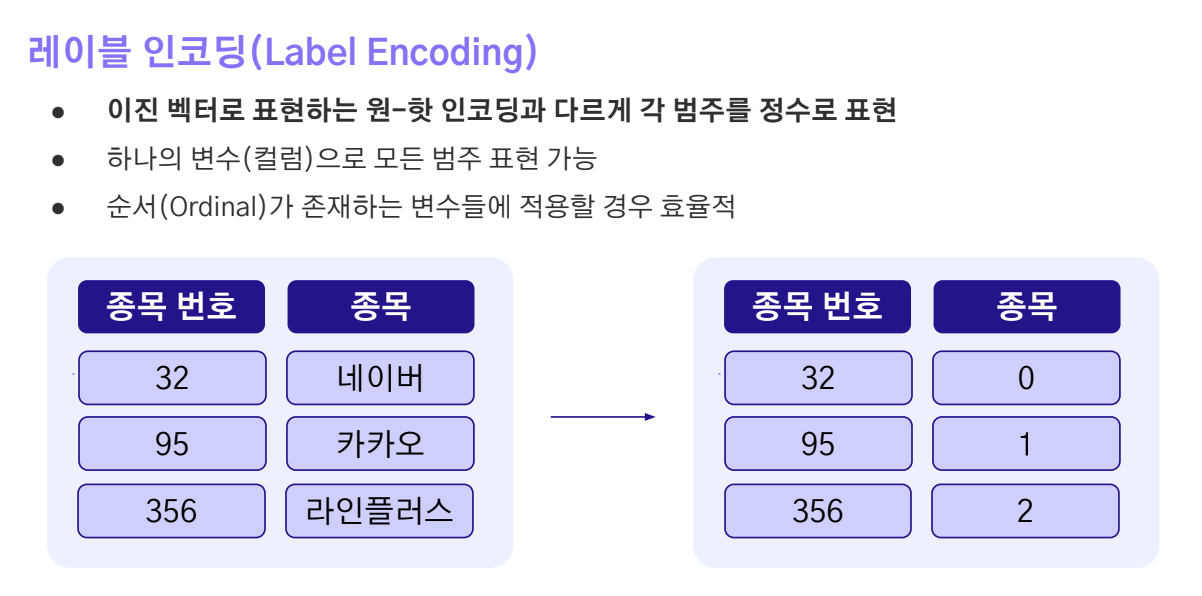

In [70]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', '60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', '85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'X', 'Y', 'target', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'ÎÖ∏ÌõÑÎèÑ', 'x3', 'y3', 'z3', 'Í≥†Îì±ÌïôÍµê Í±∞Î¶¨', 'ÌïôÍµ∞Ï†êÏàò', 'Í≥ÑÏïΩÎÖÑÏõîÏùº', 'ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏', 'Î∂ÑÏñëÌòïÌÉú', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'ÏãúÌñâÏÇ¨', 'ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


In [71]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

 21%|‚ñà‚ñà        | 6/29 [00:01<00:06,  3.29it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:05<00:00,  5.27it/s]


In [72]:
for col in categorical_columns_v2:
    missing_values = concat_select[col].isnull().sum()
    print(f"{col} Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: {missing_values}")

Î≤àÏßÄ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥∏Î≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÄÎ≤à Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏïÑÌååÌä∏Î™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÎèÑÎ°úÎ™Ö Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îã®ÏßÄÎ∂ÑÎ•ò Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï†ÑÌôîÎ≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ìå©Ïä§Î≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î∂ÑÏñëÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Î≥µÎèÑÏú†Ìòï Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÎÇúÎ∞©Î∞©Ïãù Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0


Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏãúÌñâÏÇ¨ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÇ¨Ïö©ÏäπÏù∏Ïùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏàòÏ†ïÏùºÏûê Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îã®ÏßÄÏäπÏù∏Ïùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îã®ÏßÄÏã†Ï≤≠Ïùº Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Íµ¨ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Îèô Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥ÑÏïΩÎÖÑ Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≥ÑÏïΩÏõî Ïó¥ Í≤∞Ï∏°Ïπò Í∞úÏàò: 0


In [73]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  Îã®ÏßÄÎ∂ÑÎ•ò  Ï†ÑÌôîÎ≤àÌò∏  Ìå©Ïä§Î≤àÌò∏  Î∂ÑÏñëÌòïÌÉú  \
0  4112  1086   1   273  79.97    8  3  1987  5243     3   347   311     2   

   Í¥ÄÎ¶¨Î∞©Ïãù  Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  ÏãúÌñâÏÇ¨  ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
0     2     1     1   8.0  270.0       204  167     15  22637.0  20204.0   

   Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  ÏàòÏ†ïÏùºÏûê  Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏  Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0  22637.0       20.0          250.0             0.0   139       408        4   

   ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò  Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  Îã®ÏßÄÏäπÏù∏Ïùº  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0         1        4  4858.0  262.0                    4    543       1   

   Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú          X          Y  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  \
0        0  127.05721  37.476763    173  124000.0  0  8   10   11     1     0   

   ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò     Í≥ÑÏïΩÎÖÑÏõîÏùº  ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨  
0   38  0.172023 -0.038892  0.984325    521.0  22.553333  20171208        1.5

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [74]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [75]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [76]:
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
'''model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)'''
# Replace RandomForestRegressor with LGBMRegressor
model = LGBMRegressor(n_estimators=100, objective='rmse', learning_rate=0.01, max_depth=5)

model.fit(X_train, y_train)
pred = model.predict(X_val)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8455
[LightGBM] [Info] Number of data points in the train set: 576706, number of used features: 55
[LightGBM] [Info] Start training from score 49558.448036


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [77]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 20757.618775226798


- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

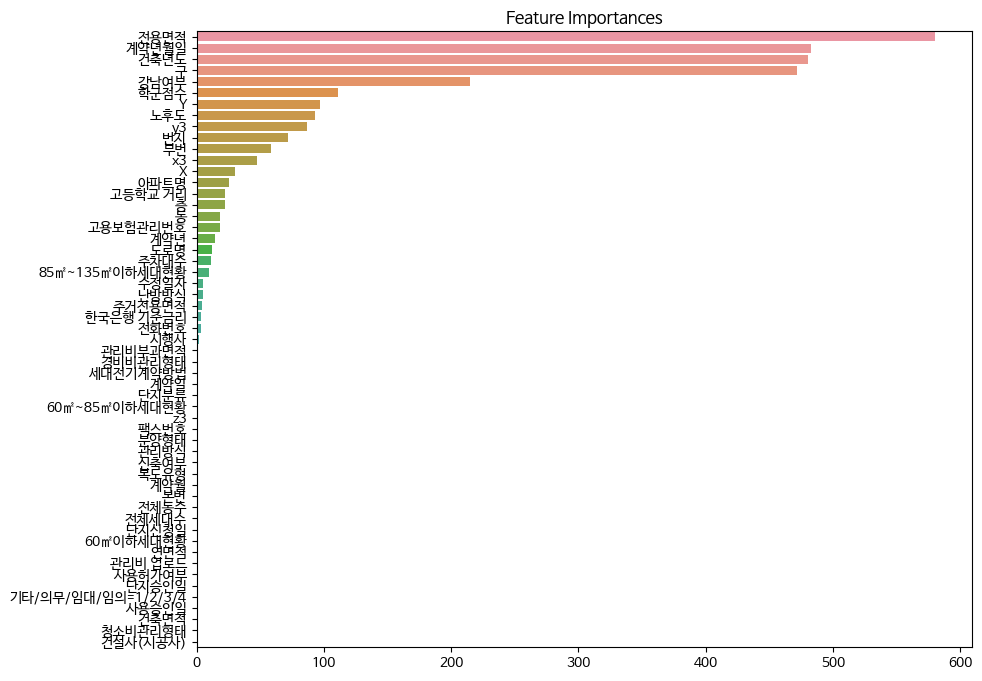

In [78]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [79]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [80]:
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [81]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [82]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [83]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [84]:
X_val_sort.head()

Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö    Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  Îã®ÏßÄÎ∂ÑÎ•ò  Ï†ÑÌôîÎ≤àÌò∏  Ìå©Ïä§Î≤àÌò∏  \
152691  4677  1195   0  1934  107.47   20   5  1973  4763     0   827  1023   
152364  4677  1195   0  1934  107.47   28   5  1973  4763     0   827  1023   
152460  1075   411   0  3112  114.94   28   8  2018  6351     3   328   294   
150636  4159  1100   0  1174  121.74   30  15  2005  4208     0   827  1023   
175936  1075   411   0  3112  114.94    4  11  2018  6351     3   328   795   

        Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù  Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù      Ï†ÑÏ≤¥ÎèôÏàò       Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  ÏãúÌñâÏÇ¨  ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
152691     0     0     0     0  5.267123  831.969178        63   48    507   
152364     0     0     0     0  3.028140  239.177763        63   48    507   
152460     1     1     1     4  7.000000  607.000000        54  181    471   
150636     0     0     0     0  4.015317  339.929978        63   48    507   
175936     1     1     1     4  7.000000  607.000000        54  181    471   

                  Ïó∞Î©¥Ï†Å        Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å       Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å   60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
152691  102339.345890  66354.407534  66831.263699  185.078767     596.359589   
152364   33466.333562  18620.006863  23886.268360   65.424159     172.817433   
152460  111291.000000  51475.000000  69777.000000  162.000000     291.000000   
150636   62618.617068  34117.822757  44379.647702   63.146608     126.293217   
175936  111291.000000  51475.000000  69777.000000  162.000000     291.000000   

        85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  ÏàòÏ†ïÏùºÏûê  Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏  Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
152691       46.544521   556       408        0         0        0   
152364        0.233356   556       408        0         0        0   
152460      148.000000   110       408        2         2        2   
150636      122.262582   556       408        0         0        0   
175936      148.000000   110       408        2         2        2   

               Í±¥Ï∂ïÎ©¥Ï†Å        Ï£ºÏ∞®ÎåÄÏàò  Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  Îã®ÏßÄÏäπÏù∏Ïùº  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
152691   195.731507  734.198630                    0    550       0        1   
152364    20.012766  253.997941                    0    550       0        1   
152460  4667.650000  981.000000                    2    521       1        0   
150636     0.000000  420.529540                    0    550       0        1   
175936  4667.650000  981.000000                    2    521       1        0   

                 X          Y  Îã®ÏßÄÏã†Ï≤≠Ïùº   Íµ¨    Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ  \
152691  127.016858  37.599940    180  14  106   15    5     1     0   52   
152364  126.997210  37.504102    180  14  106   14    9     1     0   52   
152460  127.008290  37.510879    151  14  244   15    3     1     1    7   
150636  127.042787  37.504643    180   0   56   15    3     1     0   20   
175936  127.008290  37.510879    151  14  244   14    6     1     1    7   

              x3        y3        z3     Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò     Í≥ÑÏïΩÎÖÑÏõîÏùº  \
152691  0.214869 -0.021379  0.976409  540.462254  36.020739  20220620   
152364  0.230616 -0.045551  0.971978  540.462254  36.020739  20211028   
152460  0.220326 -0.041970  0.974523  540.462254  36.020739  20220428   
150636  0.186951 -0.036821  0.981679  604.148675  48.116520  20220430   
175936  0.220326 -0.041970  0.974523  540.462254  36.020739  20210704   

        ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨    target           pred         error  
152691       1.75  565000.0  166008.475121  1.591942e+11  
152364       0.75  560000.0  170934.539129  1.513719e+11  
152460       1.50  470000.0  116259.203958  1.251326e+11  
150636       1.50  440000.0  140460.737454  8.972377e+10  
175936       0.50  400000.0  11625

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [85]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [86]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [87]:
display(error_top100.head(1))
display(best_top100.head(1))

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à     ÏïÑÌååÌä∏Î™Ö    Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ      ÎèÑÎ°úÎ™Ö  Îã®ÏßÄÎ∂ÑÎ•ò  Ï†ÑÌôîÎ≤àÌò∏  \
152691  757  757.0  0.0  Î∞òÌè¨Ï£ºÍ≥µ1Îã®ÏßÄ  107.47   20  5  1973  Ïã†Î∞òÌè¨Î°ú 45  NULL  NULL   

        Ìå©Ïä§Î≤àÌò∏  Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù  Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù      Ï†ÑÏ≤¥ÎèôÏàò       Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)   ÏãúÌñâÏÇ¨  \
152691  NULL  NULL  NULL  NULL  NULL  5.267123  831.969178     NULL  NULL   

       ÏÇ¨Ïö©ÏäπÏù∏Ïùº           Ïó∞Î©¥Ï†Å        Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å       Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å   60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
152691  NULL  102339.34589  66354.407534  66831.263699  185.078767   

        60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
152691     596.359589       46.544521  NULL     NULL    NULL     NULL    NULL   

              Í±¥Ï∂ïÎ©¥Ï†Å       Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
152691  195.731507  734.19863                NULL  NULL   NULL    NULL   

                 X         Y Îã®ÏßÄÏã†Ï≤≠Ïùº    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ  \
152691  127.016858  37.59994  NULL  ÏÑúÏ¥àÍµ¨  Î∞òÌè¨Îèô  2022  06     1     0   52   

              x3        y3        z3     Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò     Í≥ÑÏïΩÎÖÑÏõîÏùº  \
152691  0.214869 -0.021379  0.976409  540.462254  36.020739  20220620   

        ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨    target           pred         error  
152691       1.75  565000.0  166008.475121  1.591942e+11

Î≤àÏßÄ    Î≥∏Î≤à    Î∂ÄÎ≤à   ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ      ÎèÑÎ°úÎ™Ö  Îã®ÏßÄÎ∂ÑÎ•ò  Ï†ÑÌôîÎ≤àÌò∏  \
678192  55-12  55.0  12.0  Ïã†Î∞òÌè¨16  52.26   21  5  1983  Ïû†ÏõêÎ°ú 157  NULL  NULL   

        Ìå©Ïä§Î≤àÌò∏  Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù  Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)   ÏãúÌñâÏÇ¨ ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
678192  NULL  NULL  NULL  NULL  NULL   6.0  580.0     NULL  NULL  NULL   

            Ïó∞Î©¥Ï†Å   Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  \
678192  79253.0  48784.0  62546.0        0.0          580.0             0.0   

        ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò  \
678192  NULL     NULL    NULL     NULL    NULL   0.0  660.0   

       Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú           X         Y Îã®ÏßÄÏã†Ï≤≠Ïùº  \
678192                NULL  NULL   NULL    NULL  127.045108  37.54037  NULL   

          Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ        x3       y3        z3  \
678192  ÏÑúÏ¥àÍµ¨  Ïû†ÏõêÎèô  2007  12     1     0   42  0.185897 -0.02976  0.982118   

           Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò     Í≥ÑÏïΩÎÖÑÏõîÏùº  ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨   target          pred  \
678192  540.462254  36.020739  20071221        5.0  45850.0  45867.673898   

             error  
678192  312.366686

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

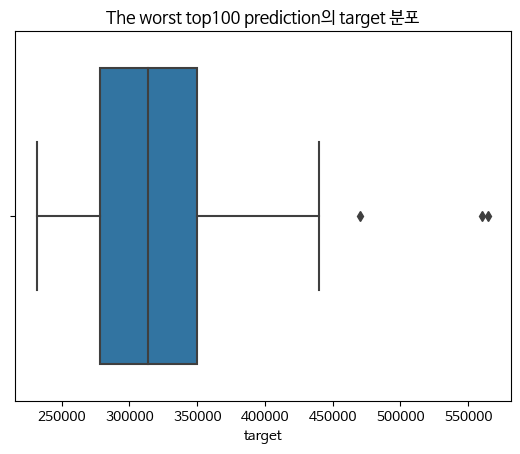

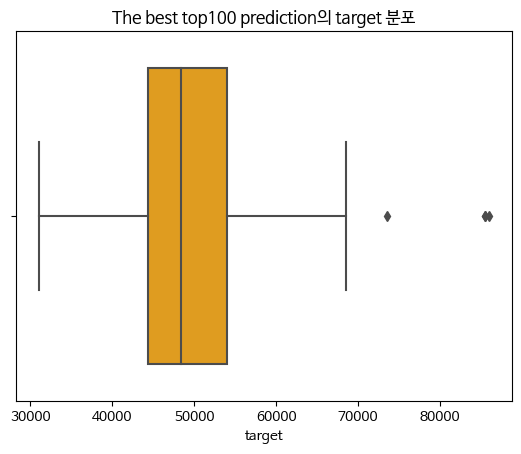

In [88]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

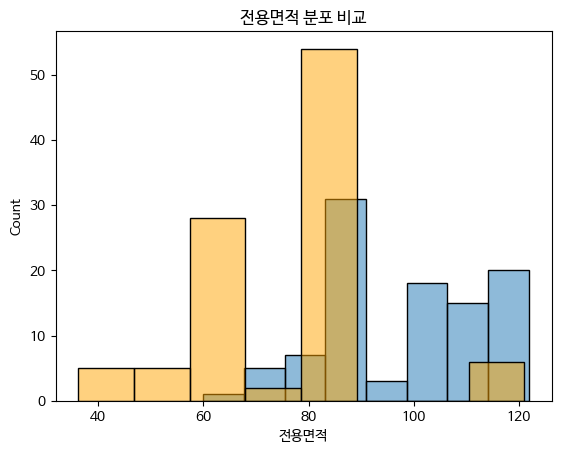

In [89]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6. Inference

In [90]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö      Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  Îã®ÏßÄÎ∂ÑÎ•ò  Ï†ÑÌôîÎ≤àÌò∏  Ìå©Ïä§Î≤àÌò∏  \
1  4112  1086   1   273   79.9700   26   5  1987  5243     3   347   311   
3  4088  1079   1  5471  108.2017   15  10  2021   407     3   935  1135   

   Î∂ÑÏñëÌòïÌÉú  Í¥ÄÎ¶¨Î∞©Ïãù  Î≥µÎèÑÏú†Ìòï  ÎÇúÎ∞©Î∞©Ïãù  Ï†ÑÏ≤¥ÎèôÏàò  Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  ÏãúÌñâÏÇ¨  ÏÇ¨Ïö©ÏäπÏù∏Ïùº      Ïó∞Î©¥Ï†Å  \
1     2     2     1     1   8.0  270.0       204  167     15  22637.0   
3     2     1     1     4   2.0  232.0       327  437    655  44951.0   

    Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  60„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  60„é°~85„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  85„é°~135„é°Ïù¥ÌïòÏÑ∏ÎåÄÌòÑÌô©  ÏàòÏ†ïÏùºÏûê  Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏  \
1  20204.0  22637.0       20.0          250.0             0.0   139       408   
3  24878.0  31174.0        0.0            0.0           232.0   621       408   

   Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò  Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  Îã®ÏßÄÏäπÏù∏Ïùº  \
1        4         1        4  4858.00  262.0                    4    543   
3        2         2        2  2724.46  305.0                    2    714   

   ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú           X          Y  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  \
1       1        0  127.057210  37.476763    173       0  0  8   16    6   
3       1        0  127.056394  37.484892    246       0  0  8   16    7   

   Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  ÎÖ∏ÌõÑÎèÑ        x3        y3        z3  Í≥†Îì±ÌïôÍµê Í±∞Î¶¨       ÌïôÍµ∞Ï†êÏàò  \
1     1     0   38  0.172023 -0.038892  0.984325    521.0  22.553333   
3     1     1    4  0.173118 -0.037663  0.984181    521.0  22.553333   

      Í≥ÑÏïΩÎÖÑÏõîÏùº  ÌïúÍµ≠ÏùÄÌñâ Í∏∞Ï§ÄÍ∏àÎ¶¨  
1  20230726        3.5  
3  20230815        3.5

In [91]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [92]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
CPU times: user 35.8 ms, sys: 0 ns, total: 35.8 ms
Wall time: 9.9 ms


In [93]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([110225.62953477, 152842.93478491, 145769.37803308, ...,
        66026.20803417,  49984.71529061,  49984.71529061])

## 7. Output File Save

In [94]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)